# dGbyG API

<kbd>dGbyG</kbd> is a python package, and it has two core classes: <kbd>Compound</kbd> and <kbd>Reaction</kbd> for users. You should import <kbd>Compound</kbd> and <kbd>Reaction</kbd> from <kbd>dGbyG.api</kbd> before doing anything else. 

Code example:

In [1]:
from dGbyG.api import Compound, Reaction

Below is the usage of the <kbd>Compound</kbd> and <kbd>Reaction</kbd> class:

## 1. dGbyG.api.Compound
### 1.1. Instantiating a <kbd>Compound</kbd> class
<kbd>Compound</kbd> class is used to represent a real compound or metabolite. You can instantiate a <kbd>Compound</kbd> class by providing the <kbd>mol</kbd> and the <kbd>mol type</kbd>. 
- <kbd>mol</kbd>: the compound id
- <kbd>mol_type</kbd>: the kind of the compound id, such as *SMILES*, *InChI*, *KEGG ID*, *MetaNetX ID*, *ChEBI ID*, etc. <kbd>mol_type</kbd> is case insensitive

<kbd>Compound</kbd> class supports different formats of compound, such as *SMILES* and *InChI*, and many kinds of compound ID from different databases, such as *KEGG* and *HMDB*, as the input of the <kbd>Compound</kbd>. The full list of supported input types can be found in the following code:

In [2]:
from dGbyG.utils.ChemFunc import to_mol_methods
print(', '.join(to_mol_methods().keys()))

inchi, smiles, file, kegg, kegg.compound, metanetx, metanetx.chemical, hmdb, chebi, lipidmaps, recon3d, inchi-key, name


When you have a compound id, you can instantiate a <kbd>Compound</kbd> class. Here uses *D-Glucose* as the example, which kegg id is *C00031*.

In [3]:
comp = Compound(mol='C00031', mol_type='KEGG')

Once successfully instantiated, molecular properties can be accessed. Here, we show them one by one.

### 1.2. Properties of the <kbd>Compound</kbd> class
#### 1.2.1. <kbd>Compound.mol</kbd>
<kbd>Compound.mol</kbd> is the very first property of the compound. It is the instance of class <kbd>rdkit.Chem.rdchem.Mol</kbd>. 


In [4]:
type(comp.mol)

rdkit.Chem.rdchem.Mol

#### 1.2.2. <kbd>Compound.image</kbd>
The image of the input compound.

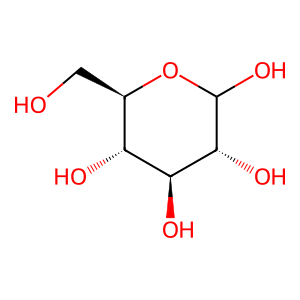

In [5]:
comp.image

#### 1.2.3. <kbd>Compound.Smiles</kbd>
SMILES strings of compound chemical structures

In [6]:
comp.Smiles

'OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O'

#### 1.2.4. <kbd>Compound.InChI</kbd>
InChI strings of compound chemical structures

In [7]:
comp.InChI

'InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1'

#### 1.2.5. <kbd>Compound.condition</kbd>
Condition of the compound represents the environment of the compound, namely the corresponding values of the solution. The default condition are *T=298.15 K*, *pH=7*, *I=0.25 M*, *pMg=14*, *e_potential=0 V*.

In [8]:
comp.condition

{'T': 298.15, 'pH': 7.0, 'I': 0.25, 'pMg': 14.0, 'e_potential': 0.0}

- <kbd>T</kbd>: temperature. The unit is Kelvin
- <kbd>I</kbd>: ionic strength. The unit is mol/L
- The unit of electric potential <kbd>e_potential</kbd> is V

All the values of condition can be changed except for temperature. The default value of temperature is 298.15 K. Below are code example:

In [9]:
comp.condition = {'pH': 7.2, 'I': 0.5, 'e_potential': 0.0, 'pMg':13}
comp.condition

{'T': 298.15, 'pH': 7.2, 'I': 0.5, 'pMg': 13.0, 'e_potential': 0.0}

#### 1.2.6. <kbd>Compound.pKa()</kbd>
pKa is the negative log of the acid dissociation constant Ka, which indicates the strength of an acid.

In [10]:
comp.pKa()

{'acidicValuesByAtom': [{'atomIndex': 0, 'value': 15.11737379248446},
  {'atomIndex': 5, 'value': 11.294477410100573},
  {'atomIndex': 7, 'value': 13.57586902628433},
  {'atomIndex': 9, 'value': 14.509836100437038},
  {'atomIndex': 11, 'value': 12.683142249589677}],
 'basicValuesByAtom': [{'atomIndex': 0, 'value': -2.979126624662507},
  {'atomIndex': 3, 'value': -4.38888831792159},
  {'atomIndex': 5, 'value': -4.390878810137953},
  {'atomIndex': 7, 'value': -3.941776974304411},
  {'atomIndex': 9, 'value': -3.676152690249095},
  {'atomIndex': 11, 'value': -3.646080487840227}]}

#### 1.2.7. <kbd>Compound.standard_dGf_prime</kbd>
The standard free energy of formation of the compound at the default condition. The unit is kJ/mol.

In [11]:
comp.standard_dGf_prime

(-424.44495, 0.59214187)

#### 1.2.8. <kbd>Compound.transformed_standard_dGf_prime</kbd>
The transformed standard free energy of formation of the compound at the given condition. The unit is kJ/mol.

In [12]:
comp.transformed_standard_dGf_prime

(-408.86487468594765, 0.59214187)

#### 1.2.9. <kbd>Compound.name</kbd>
The common name of the compound

In [13]:
comp.name

['D-Glucose', 'Grape sugar', 'Dextrose', 'Glucose', 'D-Glucopyranose']

#### 1.2.10. <kbd>Compound.enzyme</kbd>
The enzymes that catalyze the reactions which include this compound

In [14]:
comp.enzyme

['1.1.1.118',
 '1.1.1.119',
 '1.1.1.121',
 '1.1.1.359',
 '1.1.1.360',
 '1.1.1.432',
 '1.1.3.10',
 '1.1.5.2',
 '1.1.5.9',
 '1.1.99.28',
 '1.1.99.35',
 '2.3.1.72',
 '2.3.1.90',
 '2.3.1.91',
 '2.3.1.92',
 '2.3.1.103',
 '2.3.1.143',
 '2.3.1.152',
 '2.3.1.-',
 '2.4.1.8',
 '2.4.1.9',
 '2.4.1.10',
 '2.4.1.20',
 '2.4.1.22',
 '2.4.1.25',
 '2.4.1.31',
 '2.4.1.64',
 '2.4.1.99',
 '2.4.1.230',
 '2.4.1.245',
 '2.4.1.279',
 '2.4.1.281',
 '2.7.1.1',
 '2.7.1.2',
 '2.7.1.41',
 '2.7.1.42',
 '2.7.1.61',
 '2.7.1.62',
 '2.7.1.63',
 '2.7.1.142',
 '2.7.1.147',
 '2.7.1.199',
 '3.1.1.33',
 '3.1.3.9',
 '3.1.3.10',
 '3.1.3.58',
 '3.1.4.48',
 '3.1.6.3',
 '3.2.1.3',
 '3.2.1.10',
 '3.2.1.20',
 '3.2.1.21',
 '3.2.1.22',
 '3.2.1.23',
 '3.2.1.26',
 '3.2.1.28',
 '3.2.1.39',
 '3.2.1.42',
 '3.2.1.45',
 '3.2.1.48',
 '3.2.1.58',
 '3.2.1.74',
 '3.2.1.86',
 '3.2.1.93',
 '3.2.1.104',
 '3.2.1.105',
 '3.2.1.107',
 '3.2.1.108',
 '3.2.1.117',
 '3.2.1.118',
 '3.2.1.122',
 '3.2.1.125',
 '3.2.1.126',
 '3.2.1.147',
 '3.2.1.175',
 '3.2.

## 2. dGbyG.api.Reaction

In [15]:
from dGbyG.api import Reaction